## Arquitectura LeNet-5 para Digits-MNIST

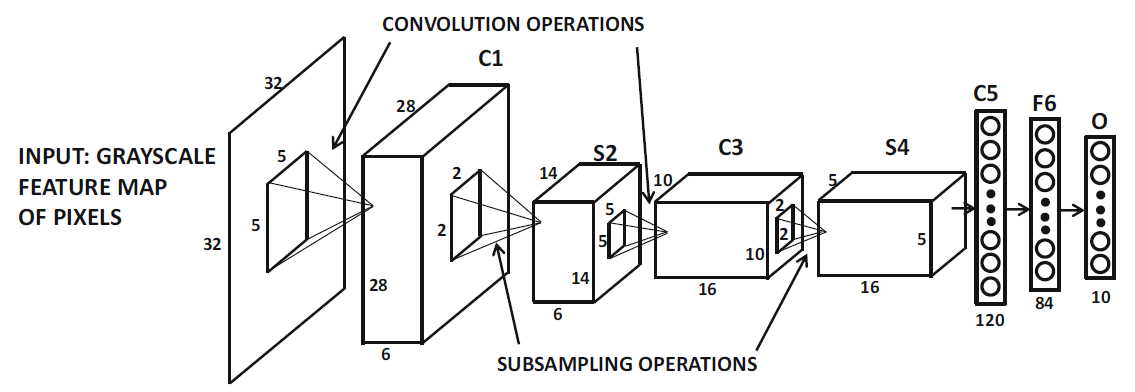

In [1]:
# importa las librerías
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#revisar memoria usada
import os
import psutil

#función para revisar la memoria usada
def huella_de_memoria():
    '''Regresa la memoria usada por el proceso en megabytes'''
    mem = psutil.Process(os.getpid()).memory_info().rss
    return (mem / 1024 ** 2)

mem = huella_de_memoria()
mem

345.23046875

In [3]:
#Is cuda available

tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
# Se importan los datasets
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split


datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

def load_images_with_labels(directory_path, target_size=(256, 256)):
    """
    Se cargan todas las imagenes como arrays de numpy y se devuelven junto con las etiquetas.
    """
    images = []
    labels = []
    
    # Loop through each subdirectory (each subdirectory represents a class label)
    for class_label in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_label)
        
        if os.path.isdir(class_path):  # Only process directories (class labels)
            print(f"Processing class: {class_label}")
            
            # Loop through all images in the class directory
            for filename in os.listdir(class_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for image file formats
                    file_path = os.path.join(class_path, filename)
                    
                    # Open and process the image
                    img = Image.open(file_path)
                    
                    # Resize the image (optional if already resized)
                    img = img.resize(target_size)
                    
                    # Convert the image to a NumPy array
                    img_array = np.array(img)
                    
                    aug_array = img_array.reshape((1,) + img_array.shape)  # Cambia la forma a (1, height, width, channels)
                    # Generar una imagen aumentada
                    aug_iter = datagen.flow(aug_array, batch_size=1)
                    aug_img = next(aug_iter)[0].astype('uint8')  # Obtener imagen aumentada como array
                    
                    
                    
                    


                    
                    # Append the image and the corresponding label
                    images.append(img_array)
                    labels.append(class_label)  # Use the directory name as the label
                    images.append(aug_img)
                    labels.append(class_label)
    
    # Convert lists to NumPy arrays
    images_array = np.array(images)
    labels_array = np.array(labels)
    
    return images_array, labels_array

def create_train_test_split(directory_path, target_size=(256, 256), test_size=0.2, random_state=42):
    """
    Se guardan las imagenes y se dividen en conjuntos de entrenamiento y prueba.
    """
    # Load all images and labels
    images, labels = load_images_with_labels(directory_path, target_size)
    
    # Split the dataset into training and testing sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=random_state, stratify=labels
    )
    
    return (train_images, train_labels), (test_images, test_labels)

# Example usage:
directory_path = r"C:\Users\progra.DESKTOP-GV4Q93K\Documents\Vstudio\Diseño de redes neuronales\Dataset"
(train_images, train_labels), (test_images, test_labels) = create_train_test_split(directory_path, target_size=(256, 256), test_size=0.2)

# Check the dataset shapes
print(f"Training set images shape: {train_images.shape}")
print(f"Training set labels shape: {train_labels.shape}")
print(f"Test set images shape: {test_images.shape}")
print(f"Test set labels shape: {test_labels.shape}")


Processing class: 0
Processing class: 1
Processing class: 2
Training set images shape: (1971, 256, 256, 3)
Training set labels shape: (1971,)
Test set images shape: (493, 256, 256, 3)
Test set labels shape: (493,)


In [5]:
# despliega las dimensiones de los arreglos
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(1971, 256, 256, 3)
(493, 256, 256, 3)
(1971,)
(493,)


In [6]:
# Convertir las etiquetas a valores numéricos
train_labels = train_labels.astype('int')
test_labels = test_labels.astype('int')

In [7]:
# mapea etiqueta a nombre
dicc = {0:"Yo",1:"Ella",2:"Otros"}
dicc

{0: 'Yo', 1: 'Ella', 2: 'Otros'}

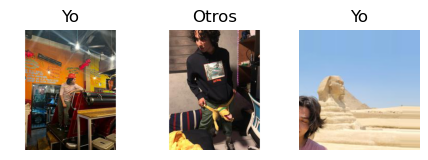

In [8]:
# despliega algunas imágenes del dataset
cc = [0,1,2]  # un ejemplo de cada clase/objeto.
fig=plt.figure(figsize=(9,9)) # figure size, inches
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(dicc[train_labels[i]])
  plt.axis('off')
  k += 1

In [9]:
# normaliza las intensidades de los pixeles de las imágenes 
x_train, x_test = train_images/255.0, test_images/255.0

In [10]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(train_labels)
ytest = tf.keras.utils.to_categorical(test_labels)
print(ytrain[0])
print(ytest[0])

[1. 0. 0.]
[0. 0. 1.]


In [11]:
labels = ["0","1","2"]
mem = huella_de_memoria()
mem

2674.79296875

In [12]:
train_images, test_images = 0 ,0

In [13]:
mem = huella_de_memoria()
mem

2632.4609375

In [14]:
# crea el modelo LeNet-5
model = tf.keras.models.Sequential([
   #Espera este input
   tf.keras.Input(shape=(256, 256, 3)),

   # C1: feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),

   # S2: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C3: feature maps: Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),

   # S4: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
   
   # C4: feature maps: Convolutional layer:
   tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),
   
   # S5: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
   
   # S6: Feature maps - Conv layer:
   tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),
   
   # S7: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C5: Flatten & Fully connection:
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(120, activation='tanh'),

   # F6: Fully conection:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output: Softmax   
   tf.keras.layers.Dense(3,activation=tf.nn.softmax)
   ])

In [15]:
mem = huella_de_memoria()
mem

2775.7734375

In [16]:
# define algunos hiper-parámetros
n_epochs=20
n_batch=100
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [17]:
mem = huella_de_memoria()
mem

2776.0390625

In [ ]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [19]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/20
20/20 [==============================] - 30s 1s/step - loss: 1.1411 - accuracy: 0.3927 - val_loss: 1.0750 - val_accuracy: 0.4199
Epoch 2/20
20/20 [==============================] - 22s 1s/step - loss: 1.0468 - accuracy: 0.4541 - val_loss: 1.0811 - val_accuracy: 0.4057
Epoch 3/20
20/20 [==============================] - 14s 713ms/step - loss: 1.0278 - accuracy: 0.4673 - val_loss: 1.0412 - val_accuracy: 0.4280
Epoch 4/20
20/20 [==============================] - 13s 626ms/step - loss: 1.0037 - accuracy: 0.4926 - val_loss: 1.0248 - val_accuracy: 0.4665
Epoch 5/20
20/20 [==============================] - 14s 684ms/step - loss: 0.9859 - accuracy: 0.5129 - val_loss: 1.0208 - val_accuracy: 0.4584
Epoch 6/20
20/20 [==============================] - 15s 734ms/step - loss: 0.9574 - accuracy: 0.5515 - val_loss: 1.2037 - val_accuracy: 0.3408
Epoch 7/20
20/20 [==============================] - 13s 651ms/step - loss: 0.9478 - accuracy: 0.5571 - val_loss: 0.9961 - val_accuracy: 0.5030
Epoch

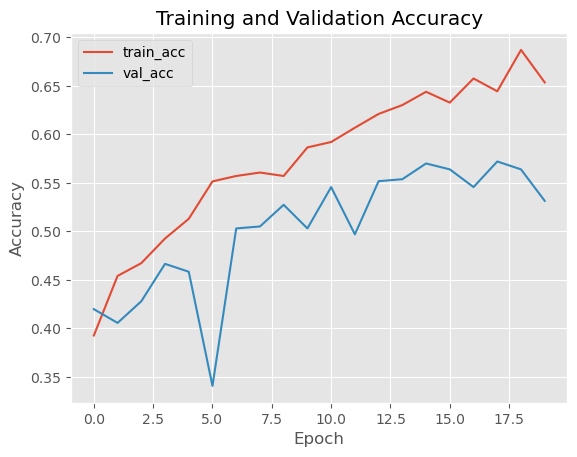

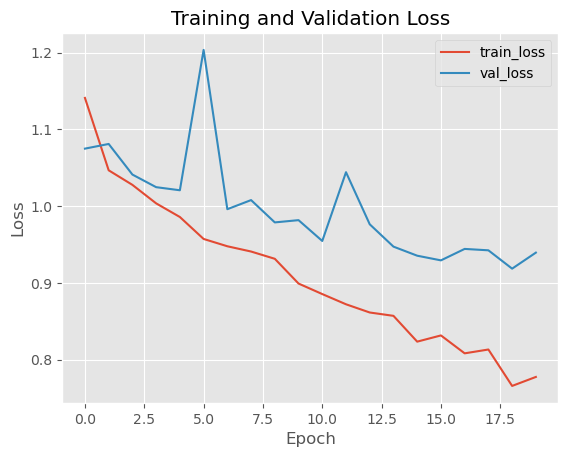

In [20]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [21]:
# estadísticas de desempeño de la red
predictions = model.predict(x_test, batch_size=n_batch)
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

5/5 [==============================] - 2s 119ms/step
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       157
           1       0.49      0.64      0.55       140
           2       0.61      0.49      0.54       196

    accuracy                           0.53       493
   macro avg       0.53      0.54      0.53       493
weighted avg       0.54      0.53      0.53       493



In [22]:
# Matriz de confusión
confusion_matrix(ytest.argmax(axis=1), predictions.argmax(axis=1))

array([[77, 42, 38],
       [28, 89, 23],
       [49, 51, 96]], dtype=int64)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 32)        12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 32)       0

In [26]:
# Cantidad de parámetros de la red
print("Parámetros del Layer conv2d: " + str( 1 * (5*5) * 6 + 6 ))  
print("Parámetros del Layer conv2d_1: " + str( 6 * (5*5) * 16 + 16 ))  
print("Parámetros del Layer conv2d_2: " + str( 16 * (5*5) * 32 + 32 ))
print("Parámetros del Layer conv2d_3: " + str( 32 * (5*5) * 64 + 64 ))
print("Parametros del Layer dense: " + str( 64 * 120 + 120 ))
print("Parametros del Layer dense_1: " + str( 120 * 84 + 84 ))


Parámetros del Layer conv2d: 156
Parámetros del Layer conv2d_1: 2416
Parámetros del Layer conv2d_2: 12832
Parámetros del Layer conv2d_3: 51264
Parametros del Layer dense: 7800
Parametros del Layer dense_1: 10164


In [56]:
class_names = ["Yo","Ella","Otros"]

In [62]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  real = np.argmax(true_label)
  if predicted_label == real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[real]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

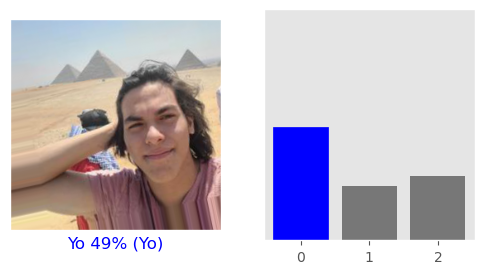

In [64]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], ytest, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

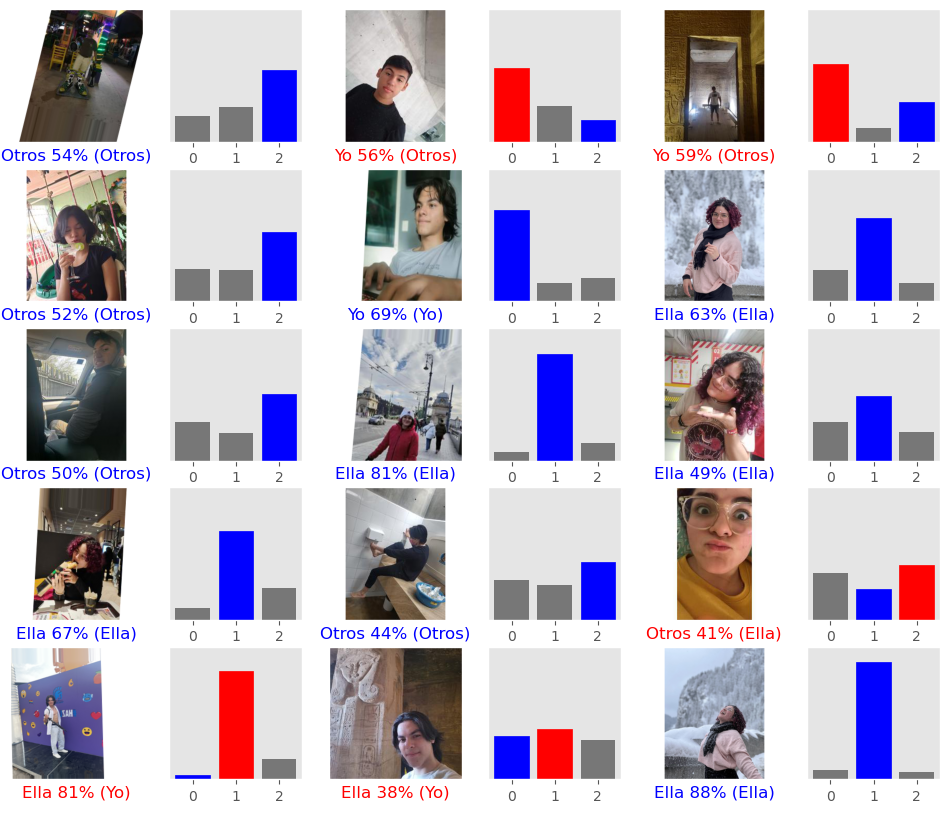

In [86]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
u= 0
num_images = num_rows*num_cols
random_test_images = np.random.randint(0, x_test.shape[0], num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in random_test_images:
  
  plt.subplot(num_rows, 2*num_cols, 2*u+1)
  plot_image(i, predictions[i], ytest, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*u+2)
  plot_value_array(i, predictions[i],  test_labels)
  u += 1

El modelo generado definitivamente no es el mejor modelo, sin embargo probe agregando una capa convolucional y la mejora fue minima, sin embargo al intentarlo con 2 más el modelo clasifico de mejor manera. Se usó un dataset de 1200 imagenes, dividas en 400 por categoria, y se hizo data augmentation para aumentar la cantidad de fotos en las que se entrena la red. Se cambio la cantidad de fotos en batch que se pasan a la red por el limite de memoria de la computadora. Lo más dificil en este caso fue el procesamiento de datos asi como el entender porque se estaba quedando sin memoria la computadora.

Considero que lo que esta evitando obtener buenos resultados es que las fotos que se tienen a pesar de ahora si estar seleccionadas a que sean close-ups de las personas, estas varian mucho pues a veces la foto esta de lado, otra esta desde abajo y esta variación de los angulos genera problemas al evaluar los filtros de la red. Tambien es importante mencionar que al tratar que las fotos tomen un tamaño especifico para la red, se agrega un Padding que es distinto en cada foto, lo cual afecta de gran manera el set en el que se entrena la red y los resultados que se obtiene. Se buscaran maneras de evitar agregar este padding sin deformar la imagen.